<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DeepLearning/IA_DL_Filtros_Rasgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizar filtros y rasgos en una red VGG16

Existen varias redes ya entrenadas, que pueden ser utilizadas. Por ejemplo VGG16 es una red entrenada para clasificar imágenes, fue entrenado sobre la base de datos ImageNet que tiene más de 15 millones de imágenes etiquetadas de alta resolución que pertenecen a aproximadamente 22,000 categorías.

Las capas inferiores aprenden características de bajo nivel como esquinas, bordes, mientras que las capas medias aprenden color, forma, etc. y las capas superiores aprenden características de alto nivel que representan el objeto en la imagen.

## Visualizar los filtros de la red

In [ ]:
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [ ]:
# Cargar el modelo VGG16
model = VGG16()
# Resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Mostrar los filtros usados en las capas convoluciones.

Las capas convoluciones tiene un la subcadena conv en el nombre (layer.name)

In [ ]:
for layer in model.layers:
	# Capas convolucionales
	if 'conv' not in layer.name:
		continue
	# Obtener pesos de filtros
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


Por ejemplo para los 6 primeros filtros, de los 64, para la primera capa oculta:

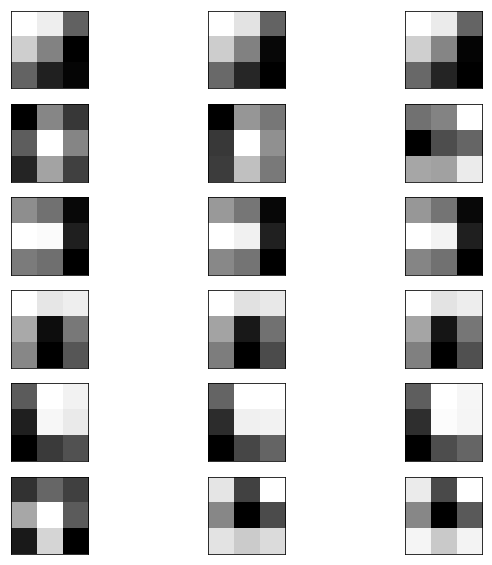

In [ ]:
plt.figure(figsize=(10,10))
# Pesos de la primera capa oculta
filters, biases = model.layers[1].get_weights()
# normalizar los valores de filtro a 0-1 (para visualizarlos)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Graficar los primeros filtros
n_filters, ix = 6, 1

for i in range(n_filters):
	# obtener el filtro i
	f = filters[:, :, :, i]
	# graficar los canales por separado
	for j in range(3):
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# graficar canal de filtro en escala de grises
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

## Visualizar mapas de rasgos en una imagen

Los mapas de activación, llamados mapas de rasgos, capturan el resultado de aplicar los filtros a la entrada, como la imagen de entrada u otro mapa de rasgos.


Visualizar un mapa de rasgos nos ayuda a entender qué rasgos se detectan cerca de la entrada y cuáles se van detectando más a la salida.

Podemos escoger cualquier imagen para probar cómo se van detectando rasgos.


Vamos a mostrar todas las capas en el modelo e imprimir el tamaño del mapa de características para cada capa convolucional, así como el índice de capa en el modelo.

In [ ]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	if 'conv' not in layer.name:
		continue

	print(i, layer.name, layer.output.shape) # índice de capa, nombre de la capa y tamaño de salida (mapa de rasgos)

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


Podemos crear un nuevo modelo que tenga la misma entrada y como salida la primera capa convolucional

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from numpy import expand_dims

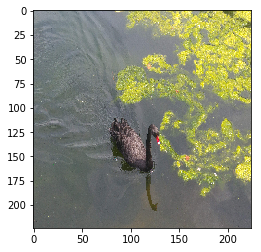

In [ ]:
# Cargar la imagen con el tamaño requerido por la red (224x224)
img = load_img('cisneNegro.jpg', target_size=(224, 224))
plt.imshow(img)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


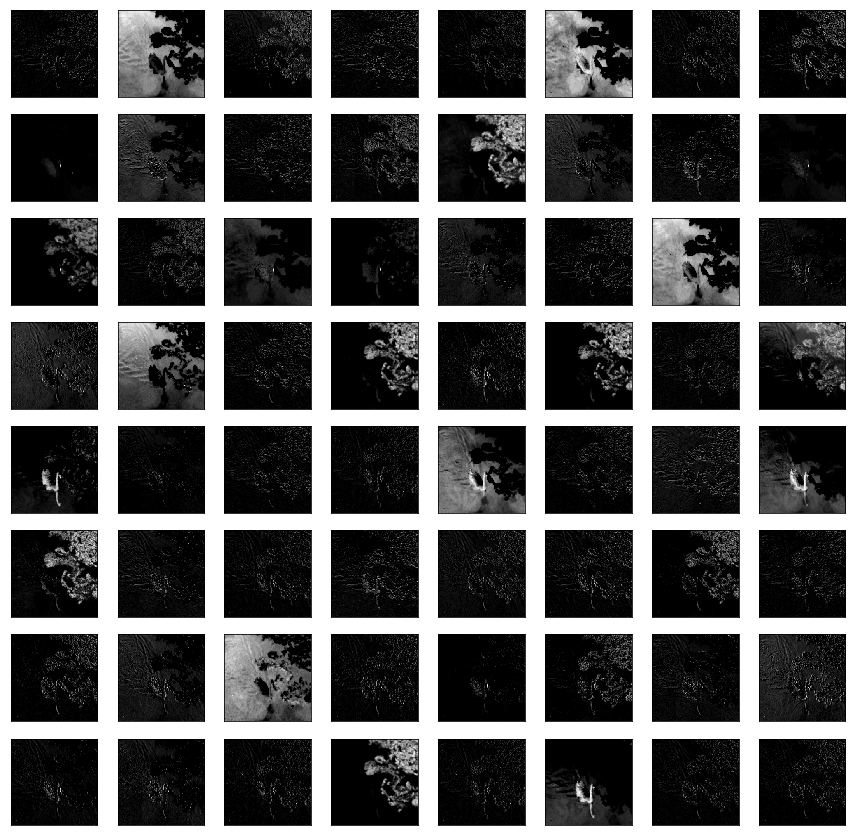

In [ ]:
plt.figure(figsize=(15,15))
# Crear un nuevo modelo, con las entras y como salida la primera capa
newmodel = Model(inputs=model.inputs, outputs=model.layers[1].output)
newmodel.summary()

# Convertir imagen a array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# preparar la imagen (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# obtener el mapa de rasgos para la primera capa
feature_maps = newmodel.predict(img)
# graficar los 64 mapas (gráfica de 8x8)
N = 8
index = 1
for _ in range(N):
	for _ in range(N):
		ax = plt.subplot(N, N, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# graficar el canal de filtro en escala de grises filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, index-1], cmap='gray')
		index += 1
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


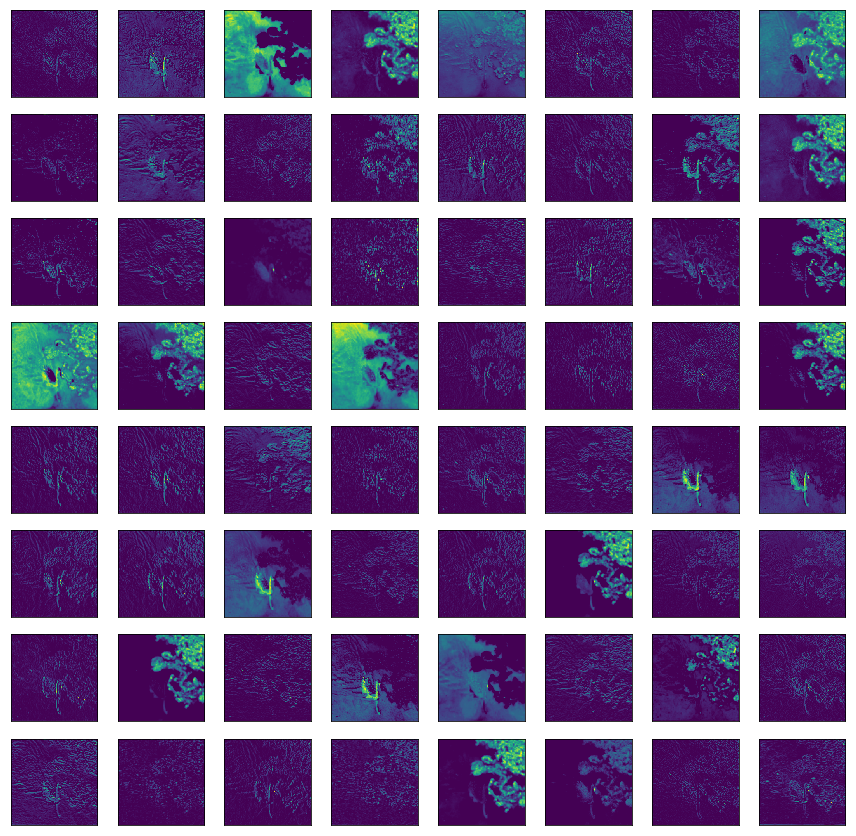

In [ ]:
plt.figure(figsize=(15,15))
newmodel2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
newmodel2.summary()

feature_maps = newmodel2.predict(img)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

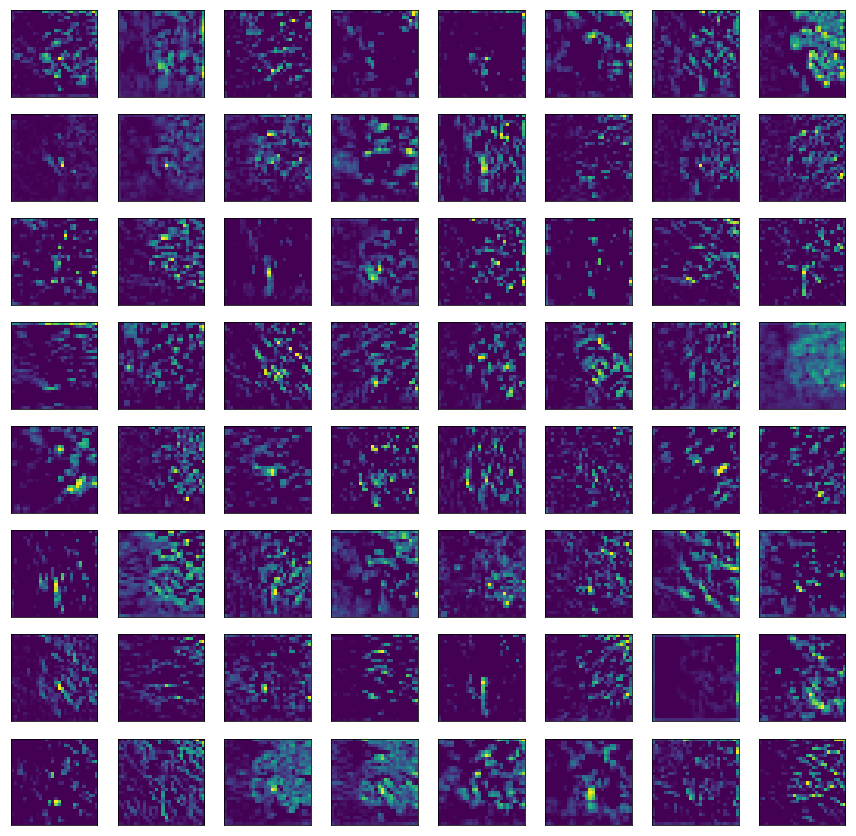

In [ ]:
plt.figure(figsize=(15,15))
newmodel2 = Model(inputs=model.inputs, outputs=model.layers[10].output)
newmodel2.summary()

feature_maps = newmodel2.predict(img)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
plt.show()

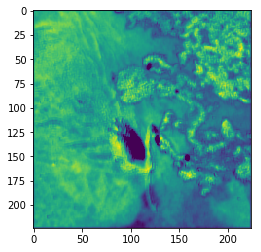

In [ ]:
newmodel2 = Model(inputs=model.inputs, outputs=model.layers[2].output)

feature_maps = newmodel2.predict(img)
plt.imshow(feature_maps[0, :, :, 24])
plt.show()